In [3]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/images/
  inflating: dataset/images/595.tif  
  inflating: dataset/images/596.tif  
  inflating: dataset/images/597.tif  
  inflating: dataset/images/598.tif  
  inflating: dataset/images/599.tif  
  inflating: dataset/images/600.tif  
  inflating: dataset/images/601.tif  
  inflating: dataset/images/602.tif  
  inflating: dataset/images/603.tif  
  inflating: dataset/images/604.tif  
  inflating: dataset/images/605.tif  
  inflating: dataset/images/606.tif  
  inflating: dataset/images/607.tif  
  inflating: dataset/images/608.tif  
  inflating: dataset/images/609.tif  
  inflating: dataset/images/583.tif  
  inflating: dataset/images/610.tif  
  inflating: dataset/images/611.tif  
  inflating: dataset/images/612.tif  
  inflating: dataset/images/614.tif  
  inflating: dataset/images/615.tif  
  inflating: dataset/images/616.tif  
  inflating: dataset/images/617.tif  
  inflating: dataset/images/577.tif  
  inflating: da

In [27]:
import os
import cv2
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision.models.detection.faster_rcnn import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import functional as F
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
!pip install -q torchmetrics
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torchvision.models.mobilenetv3 import mobilenet_v3_small, MobileNet_V3_Small_Weights

<ipython-input-36-f9a47c256bfc>:15: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  A.PadIfNeeded(min_height=384, min_width=384, border_mode=cv2.BORDER_CONSTANT, value=0),


Epoch 1/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.1629
Epoch 2/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0574


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.4048, mAR: 0.6867
Epoch 3/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0549
Epoch 4/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0509


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.5171, mAR: 0.7751
Epoch 5/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0491
Epoch 6/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0487


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.5837, mAR: 0.7952
Epoch 7/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0469
Epoch 8/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0434


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.5509, mAR: 0.7510
Epoch 9/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0437
Epoch 10/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0449


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.6513, mAR: 0.8072
Epoch 11/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0410
Epoch 12/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0400


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.6248, mAR: 0.7952
Epoch 13/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0379
Epoch 14/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0376


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.6422, mAR: 0.8072
Epoch 15/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0376
Epoch 16/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0350


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.7009, mAR: 0.8193
Epoch 17/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0335
Epoch 18/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0331


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.7487, mAR: 0.8153
Epoch 19/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0330
Epoch 20/20


Training:   0%|          | 0/175 [00:00<?, ?it/s]

  mean_loss: 0.0324


Evaluating:   0%|          | 0/20 [00:00<?, ?it/s]

mAP@0.5: 0.7476, mAR: 0.7952


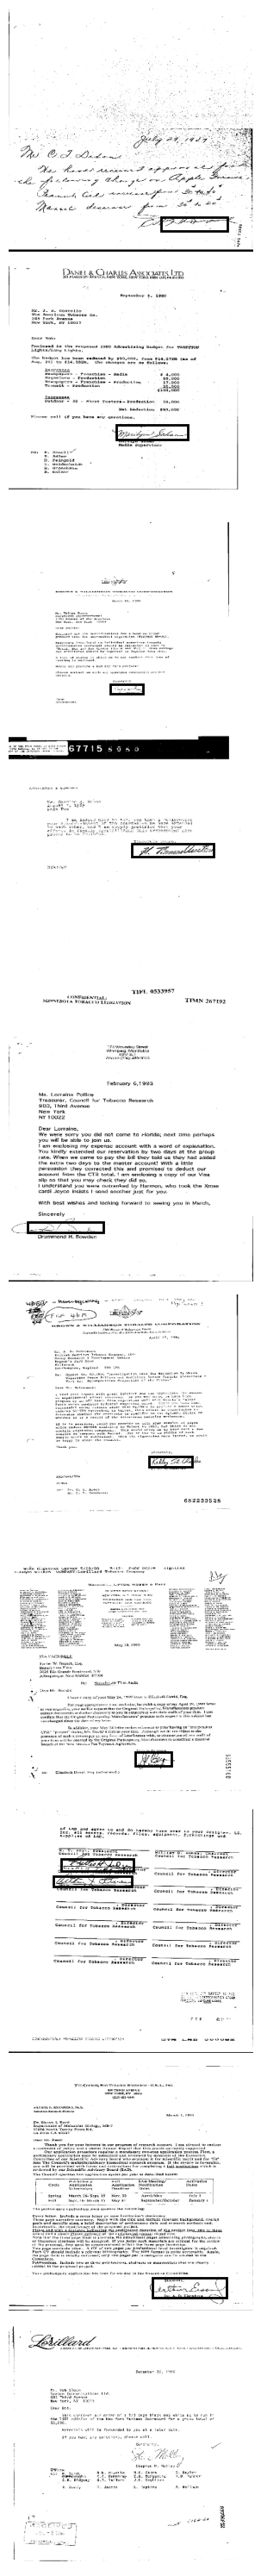

In [36]:
def read_tif_as_gray(path: str):
    """Load a .tif image as a float32 normalized grayscale tensor (C,H,W)."""
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise FileNotFoundError(path)
    # ensure 2‑D then normalize to 0‑1
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.astype('float32')
    img = (img - img.min()) / (img.max() - img.min() + 1e-6)
    return img

resize_transform = A.Compose([
    A.LongestMaxSize(max_size=384),
    A.PadIfNeeded(min_height=384, min_width=384, border_mode=cv2.BORDER_CONSTANT, value=0),
    ToTensorV2(transpose_mask=True)
], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))

class TifDetectionDataset(Dataset):
    def __init__(self, root, split='train', transforms=resize_transform):
        self.img_dir = os.path.join(root, 'images')
        self.lbl_dir = os.path.join(root, 'labels')
        self.ids = sorted([f[:-4] for f in os.listdir(self.img_dir) if f.endswith('.tif')])
        self.transforms = transforms
        if split == 'train':
            self.ids = self.ids[int(0.1*len(self.ids)):]  # 90% train
        else:
            self.ids = self.ids[:int(0.1*len(self.ids))]

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        img_id = self.ids[idx]
        img_path = os.path.join(self.img_dir, img_id + '.tif')
        label_path = os.path.join(self.lbl_dir, img_id + '.txt')
        img = read_tif_as_gray(img_path)
        boxes = []
        labels = []
        with open(label_path) as f:
            for line in f:
                line = line.replace(',', ' ')
                x1, y1, x2, y2 = map(float, line.strip().split())
                boxes.append([x1, y1, x2, y2])
                labels.append(1)
        sample = {'image': img, 'bboxes': boxes, 'class_labels': labels}
        if self.transforms:
            sample = self.transforms(**sample)
        image = sample['image']  # tensor CxHxW
        target = {
            'boxes': torch.tensor(sample['bboxes'], dtype=torch.float32),
            'labels': torch.tensor(sample['class_labels'], dtype=torch.int64),
            'image_id': torch.tensor([idx])
        }
        return image, target


def build_fasterrcnn(num_classes: int):
    weights = torchvision.models.MobileNet_V3_Small_Weights.IMAGENET1K_V1
    backbone = torchvision.models.mobilenet_v3_small(weights=weights).features
    # backbone = torch.nn.Sequential(*list(backbone.children())[:-2])
    backbone.out_channels = 576
    for p in backbone.parameters():
        p.requires_grad = False
    anchor_gen = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                 aspect_ratios=((0.5, 1.0, 2.0),))
    roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'], output_size=7, sampling_ratio=2)
    model = FasterRCNN(backbone, num_classes=num_classes, rpn_anchor_generator=anchor_gen, box_roi_pool=roi_pooler)
    return model


def train(model, loader, optimizer, device):
    model.train()
    epoch_loss = 0
    pbar = tqdm(loader, desc="Training", leave=False)
    for images, targets in pbar:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        loss = sum(loss_dict.values())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        pbar.set_postfix({"batch_loss": f"{loss.item():.3f}"})
    return epoch_loss / len(loader)

def evaluate(model, loader, device, score_thresh=0.5):
    model.eval()
    all_results = []
    with torch.no_grad():
        for images, targets in loader:
            images = [img.to(device) for img in images]
            outputs = model(images)
            for out in outputs:
                keep = out['scores'] >= score_thresh
                all_results.append({k: v[keep].cpu() for k, v in out.items()})
    return all_results

def evaluate_map(model, loader, device, iou_thresh=0.5):
    model.eval()
    metric = MeanAveragePrecision(iou_type="bbox", iou_thresholds=[iou_thresh])
    with torch.no_grad():
        for images, targets in tqdm(loader, desc="Evaluating", leave=False):
            images = [img.to(device) for img in images]
            outputs = model(images)

            # torchmetrics expects lists of dicts on CPU
            preds = [{k: v.cpu() for k, v in out.items()} for out in outputs]
            gts   = [{k: v for k, v in t.items()}           for t in targets]

            metric.update(preds, gts)

    stats = metric.compute()

    recall = (stats['mar_1'] + stats['mar_10'] + stats['mar_100']) / 3
    print(f"mAP@{iou_thresh}: {stats['map']:.4f}, mAR: {recall:.4f}")

    return stats

def visualize_samples(dataset, results, k=10):
    plt.figure(figsize=(10, k*3))
    for i in range(k):
        img, _ = dataset[i]
        res = results[i]
        img_np = img.squeeze().numpy()
        plt.subplot(k,1,i+1)
        plt.imshow(img_np, cmap='gray')
        for box in res['boxes']:
            x1,y1,x2,y2 = box
            plt.gca().add_patch(plt.Rectangle((x1,y1), x2-x1, y2-y1, fill=False, linewidth=2))
        plt.axis('off')
    plt.tight_layout()
    plt.show()


def main(data_root='/content/dataset', num_classes=2, epochs=20, batch_size=4):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    train_ds = TifDetectionDataset(data_root, 'train')
    test_ds = TifDetectionDataset(data_root, 'test')
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

    model = build_fasterrcnn(num_classes)
    model.to(device)
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.AdamW(params, lr=1e-4)

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        loss = train(model, train_loader, optimizer, device)
        print(f"  mean_loss: {loss:.4f}")
        if (epoch+1) % 2 == 0:
            evaluate_map(model, test_loader, device)
    results = evaluate(model, test_loader, device)
    visualize_samples(test_ds, results, k=min(10,len(test_ds)))

if __name__ == '__main__':
    main()
